# CODIGO (ADAPTADO) MACHINE LEARNING DO ZERO

# (TUTORIAL LECIONADO POR TARSIS AZEVEDO: @TARSISAZEVEDO)


In [28]:
# CARREGA BIBLIOTECA

import pandas
import numpy
import jupyter
import seaborn
import pytest
import sklearn

from matplotlib import pyplot

In [2]:
# CARREGA DATASET
# Cria nomes para usa-los qdo carregar o dataset
columns = ['crim', 
          'zn',
          'indus',
          'chas',
          'nox',
          'rm',
          'age',
          'dis',
          'rad',
          'tax',
          'ptratic',
          'b',
          'lstat',
          'medv']

boston_df = pandas.read_csv('https://raw.githubusercontent.com/tarsisazevedo/pybr-tutorial/master/housing-unclean.csv', names=columns)
# Alternativa: boston = pd.read_csv("housing-unclean.csv", names="crim zn undus chas nox rm age  dis rad tax ptratio b lstat mdev".split())

boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratic,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Para entender a funcao
pandas.read_csv?

# Ou digida pandas.read_csv e aperta shift+tab

## PRE-PROCESSAMENTO

In [4]:
# Tipo de cada variavel
boston_df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratic    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [5]:
# Num de linhas e colunas
boston_df.shape

(606, 14)

In [6]:
# Verifica se a linha toda esta duplicada
boston_df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
576     True
577     True
578     True
579     True
580     True
581     True
582     True
583     True
584     True
585     True
586     True
587     True
588     True
589     True
590     True
591     True
592     True
593     True
594     True
595     True
596     True
597     True
598     True
599     True
600     True
601     True
602     True
603     True
604     True
605     True
Length: 606, dtype: bool

In [7]:
# Acessa a linha 605
boston_df.iloc[605]

crim         0.04462
zn          25.00000
indus        4.86000
chas         0.00000
nox          0.42600
rm           6.61900
age         70.40000
dis          5.40070
rad          4.00000
tax        281.00000
ptratic     19.00000
b          395.63000
lstat        7.22000
medv        23.90000
Name: 605, dtype: float64

In [8]:
# Quantas linhas estao duplicadas. Essa soma funciona pq o booleano TRUE eh igual a 1
boston_df.duplicated().sum()

50

In [9]:
boston_df.drop_duplicates()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratic,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [10]:
# Repare: O jupyter nao alterou o nosso dataset
boston_df.shape

(606, 14)

In [11]:
# agora sim, vai alterar
boston_df.drop_duplicates(inplace=True)

#nao recomendo isso pra ngm. Melhor criar um novo objeto,criar versoes (v1, v2, ...) pra acompanhar as alteracoes)

In [12]:
# conta quantos nulos tem em cada coluna
boston_df.isnull().sum()

crim       50
zn         44
indus       0
chas       49
nox         0
rm          0
age        18
dis         0
rad        33
tax        17
ptratic     0
b           0
lstat       0
medv        0
dtype: int64

In [13]:
# Possibilidades para lidar com nulo:
# 1. media ou mediana dos valores
# 2. algum valor padrao
# 3. valores preditos


In [14]:
# No nosso caso, podemos soh excluir os nulos
boston_df.dropna(inplace=True)

In [15]:
boston_df.shape

(506, 14)

## ANALISE EXPLORATORIA

In [16]:
pandas.set_option('display.width',100)
pandas.set_option('precision', 3)
boston_df.describe() #aqui, variaveis categoricas estao sendo tratadas como numericas (tenha em mente que eh errado)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratic,b,lstat,medv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


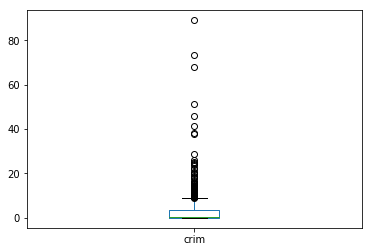

In [17]:
# boxplot da coluna crim
%matplotlib inline
boston_df.crim.plot("box")

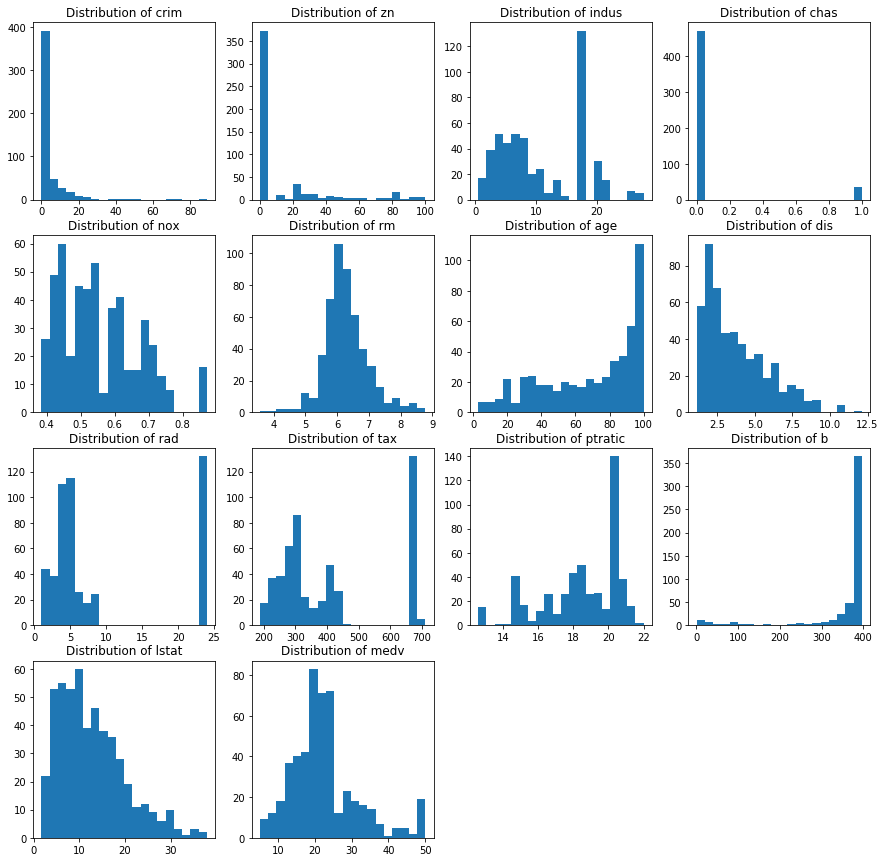

In [18]:
plot_index=1
max_plots=4
for column in boston_df.columns: 
    axes = pyplot.subplot(4, max_plots, plot_index)
    axes.set_title('Distribution of '+ column)
    axes.figure.set_figheight(15)
    axes.figure.set_figwidth(15)
    axes.figure.set_tight_layout(False)
    pyplot.hist(boston_df[column],bins=20)
    plot_index=plot_index+1

/Users/andremota/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


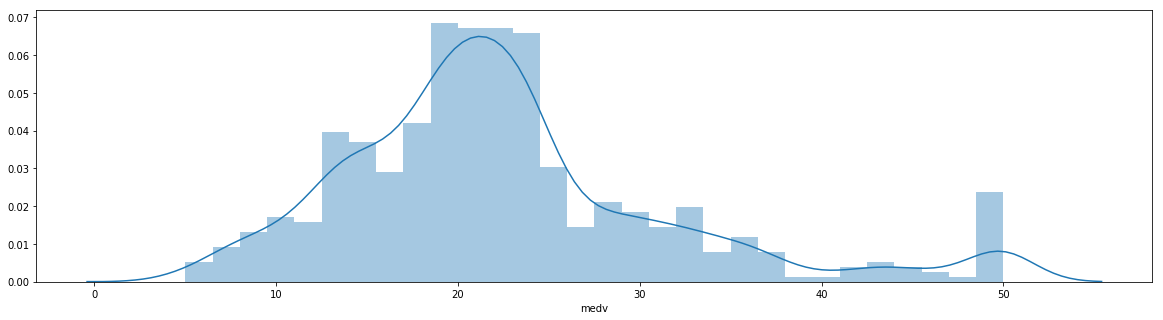

In [19]:
# a feature que vamos prever
%matplotlib inline
pyplot.figure(figsize=(20, 5))
seaborn.distplot(boston_df['medv'], bins=30)

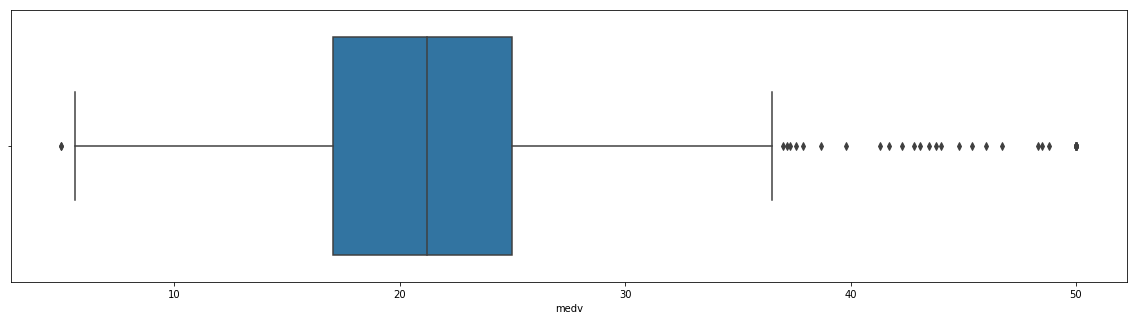

In [20]:
pyplot.figure(figsize=(20, 5))
seaborn.boxplot(boston_df['medv'])

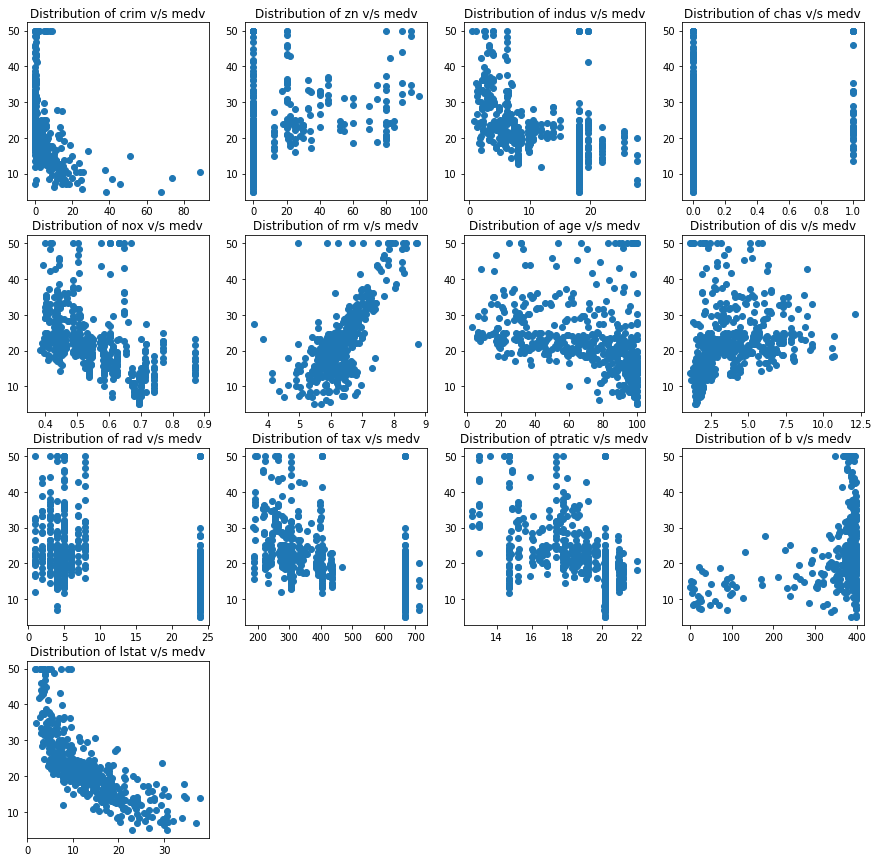

In [19]:
# Grafico de dispersao das variaveis vs medv 
plot_index=1
max_plots=4
for column in boston_df.columns: 
  if column != "medv":
      axes = pyplot.subplot(4, max_plots, plot_index)
      axes.set_title('Distribution of '+ column + " v/s medv")
      axes.figure.set_figheight(15)
      axes.figure.set_figwidth(15)
      axes.figure.set_tight_layout(False)
      pyplot.scatter(boston_df[column], boston_df["medv"], marker='o')
      plot_index=plot_index+1

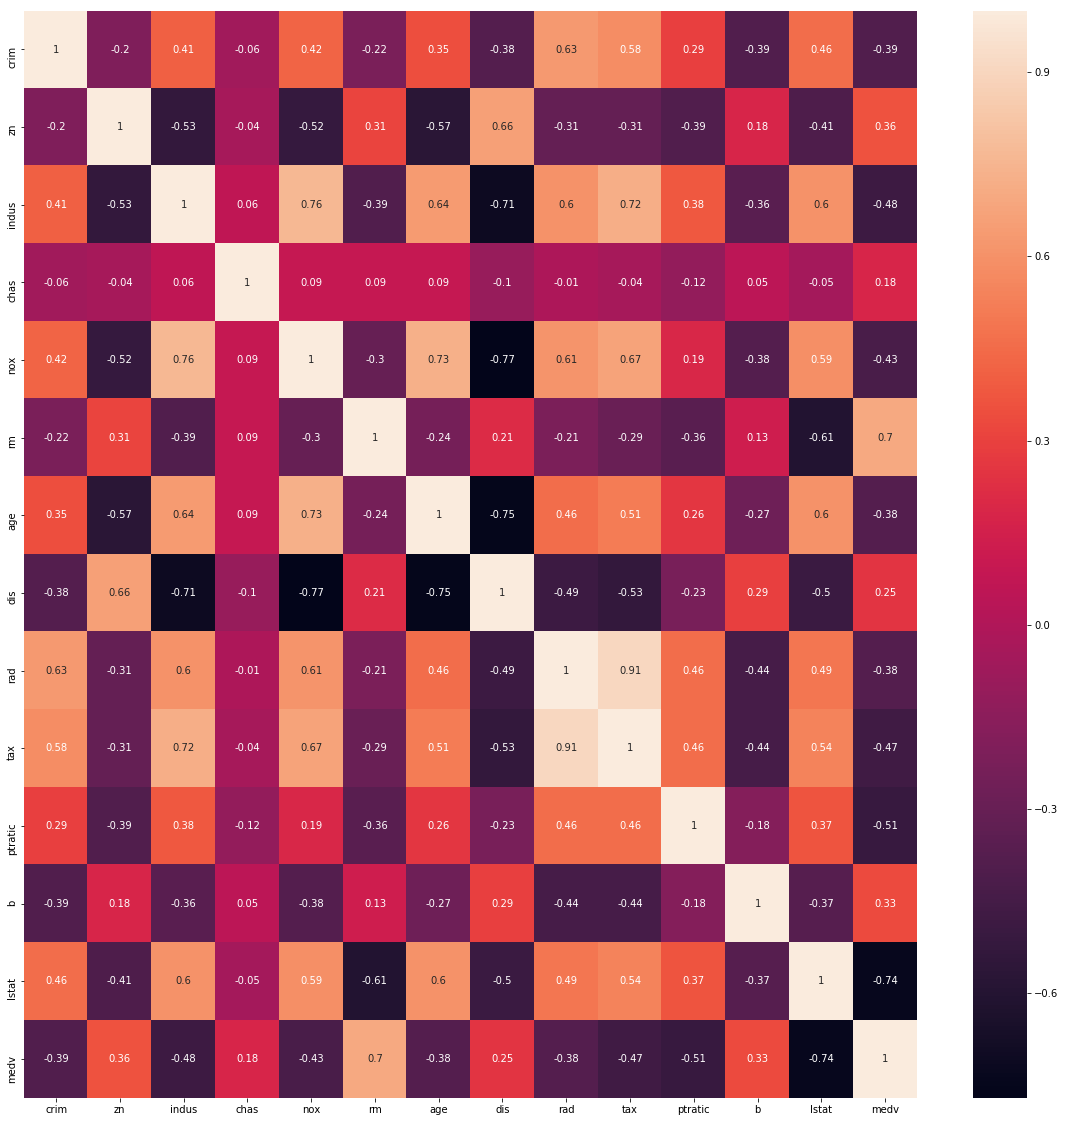

In [21]:
pyplot.figure(figsize=(20, 20))

correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
seaborn.heatmap(data=correlation_matrix, annot=True)

In [22]:
%load_ext autoreload
%autoreload 2

SOBRE O RESHAPE (sera utilizado abaixo):<br>
Reshape serve para alterar as dimensoes do vetor. Quando temos reshape(2,3) queremos que o vetor seja reorganizado com duas linhas e tres colunas. Se tivermos um vetor com 5 elementos, reshape(2,3) nao vai funcionar, pois ficaria um espaco sobrando (2*3 = 6). Precisamos que o reshape seja exato. Ao utilizarmos -1 como argumento do reshape, entao o python vai determinar qual a quantidade de linhas ou colunas que deve utilizar. Por exemplo, se tivermos um vetor com 6 elementos e utilizarmos o reshape(-1,2), entao o python sabe que voce quer duas colunas, e que o numero de linhas deve ser de acordo com o que "couber" - no caso, serao 3. Se voce tiver 5 elementos e utilizar reshape(3,-1) entao o python tentara encontrar o numero de colunas necessarias para encaixar 5 elementos. Como isso nao eh possivel, ja que precisamos ter o numero exato de posicoes no reshape, ele retornara um erro.<br>
Veja os exemplos abaixo:<br>

In [23]:
print("Ex. 1: numpy.arange(6)")
print(numpy.arange(6))
print("")

print("Ex. 2: numpy.arange(6).reshape(2,3)")
print(numpy.arange(6).reshape(2,3))
print("")

print("Ex. 3: numpy.arange(6).reshape(-1,1)")
print(numpy.arange(6).reshape(-1,1))
print("")

print("Ex. 4: numpy.arange(6).reshape(2,-1)")
print(numpy.arange(6).reshape(2,-1))
print("")

print("Ex. 5: numpy.arange(5).reshape(3,-1)")
print(numpy.arange(5).reshape(3,-1))
print("")

Ex. 1: numpy.arange(6)
[0 1 2 3 4 5]

Ex. 2: numpy.arange(6).reshape(2,3)
[[0 1 2]
 [3 4 5]]

Ex. 3: numpy.arange(6).reshape(-1,1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]

Ex. 4: numpy.arange(6).reshape(2,-1)
[[0 1 2]
 [3 4 5]]

Ex. 5: numpy.arange(5).reshape(3,-1)


ValueError: cannot reshape array of size 5 into shape (3,newaxis)

# Regressao Linear Simples

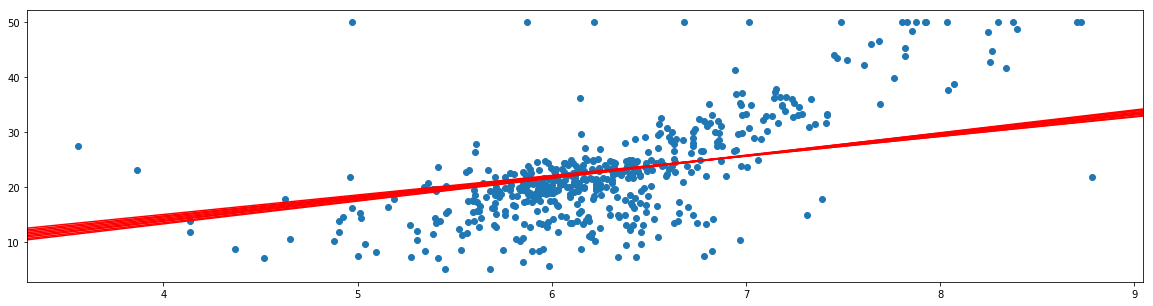

In [30]:
from linear_regression import linear_regression
from sklearn.model_selection import train_test_split

# cria um vetor com uma coluna da variavel rm (sera a variavel independente)
rm = numpy.array(boston_df["rm"]).reshape(-1,1)

# cria um vetor com uma coluna da variavel medv (sera a variavel dependente)
medv = numpy.array(boston_df["medv"]).reshape(-1,1)


# separa em treino e teste
x_train, x_test, y_train, y_test = train_test_split(rm, medv, test_size=0.2, random_state=42)

# traca e plota a regressao
pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(rm, medv)
model_rm = linear_regression.generate_model(t0, t1)

In [34]:
# Regressao linear simples (2)

import numpy
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(rm, medv)
r_sq = model.score(rm, medv)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.4835254559913341
intercept: [-34.67062078]
slope: [[9.10210898]]
